# **Chapter 6: Decision Tree**
# **1. Apa itu Decision Tree?**

Decision Tree adalah model pembelajaran terawasi yang fleksibel dan digunakan untuk klasifikasi maupun regresi. Model ini membagi data ke dalam subset berdasarkan pengujian nilai fitur terhadap ambang tertentu, membentuk struktur pohon dengan aturan pengambilan keputusan.

### Kelebihan:
- Mudah dipahami dan dijelaskan (white-box model)
- Mampu menangani data numerik maupun kategorikal
- Membutuhkan sedikit pra-pemrosesan data (tanpa perlu normalisasi)

### Kekurangan:
- Rentan terhadap overfitting jika tidak diatur dengan baik
- Sensitif terhadap perubahan kecil dalam data pelatihan


# **Melatih dan Memvisualisasikan Decision Tree**

Contoh: Melatih `DecisionTreeClassifier` pada dataset iris menggunakan fitur panjang dan lebar petal, dengan kedalaman maksimum 2.

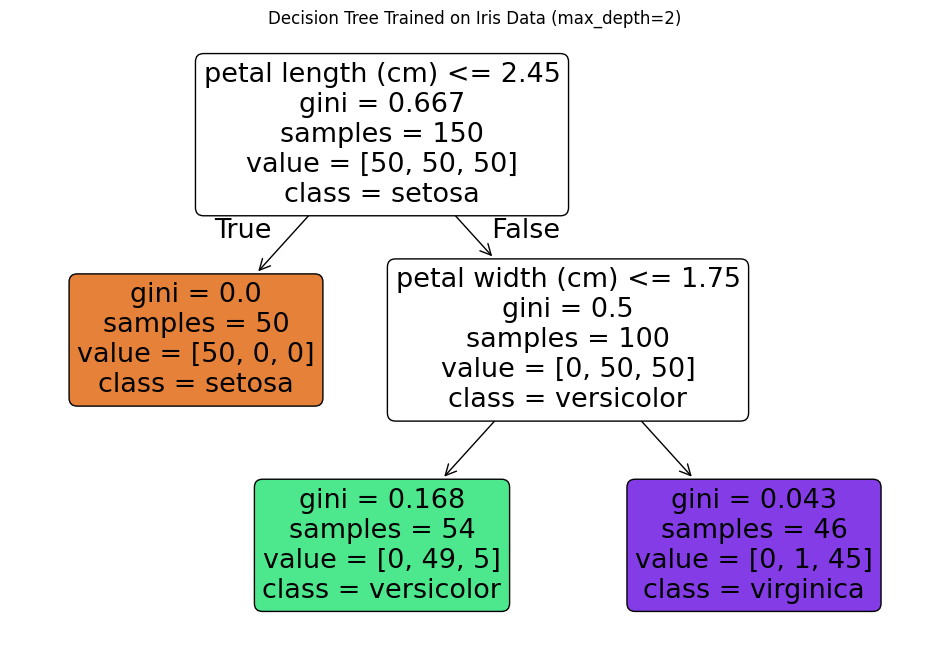

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, 2:]  # panjang dan lebar petal
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names,
          filled=True, rounded=True)
plt.title('Decision Tree Trained on Iris Data (max_depth=2)')
plt.show()

# **Cara Kerja Prediksi pada Decision Tree**
Prediksi dimulai dari akar, membandingkan nilai fitur terhadap ambang batas:
* Jika kondisi terpenuhi, lanjut ke cabang kiri
* Jika tidak, ke cabang kanan
* Diulang hingga mencapai leaf node

Leaf node memprediksi kelas atau nilai berdasarkan data pelatihan yang jatuh ke node tersebut.

Contoh: Panjang petal < 2.45 cm mengindikasikan kelas Iris setosa.

CART (Classification and Regression Trees) membangun pohon biner dengan cara memisahkan data pelatihan untuk meminimalkan impurity (Gini atau Entropy).

Ukuran impurity:
- Gini impurity (default): $$ G_i = 1 - \sum_k p_{i,k}^2 $$
- Entropy: $$ H_i = -\sum_k p_{i,k} \, \log_2 p_{i,k} $$
Algoritma ini bersifat greedy dan rekursif, terus berjalan hingga mencapai kedalaman maksimum atau memenuhi kriteria berhenti.

# **Hyperparameter Regularisasi**
Pohon keputusan cenderung overfitting jika tidak dibatasi. Untuk regularisasi, gunakan parameter berikut:
- max_depth: kedalaman maksimum pohon
- min_samples_split: jumlah minimum sampel untuk membagi node
- min_samples_leaf: jumlah minimum sampel di setiap daun
- max_leaf_nodes: jumlah maksimum leaf node
- max_features: jumlah maksimum fitur yang dievaluasi pada setiap split

Dengan meningkatkan batas minimum atau membatasi ukuran pohon, overfitting dapat dikontrol.

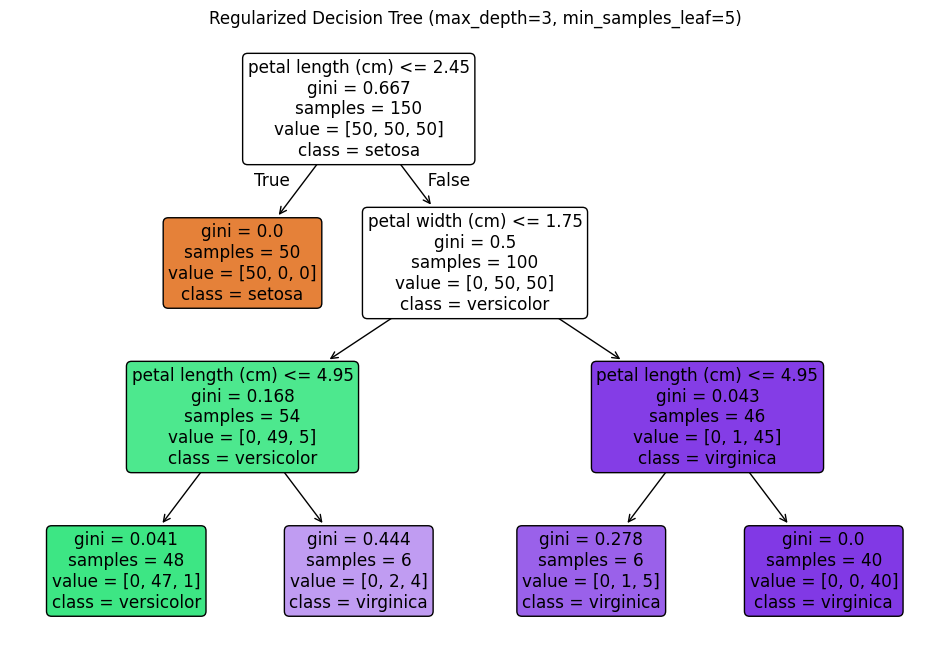

In [2]:
tree_reg_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
tree_reg_clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree_reg_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names,
          filled=True, rounded=True)
plt.title('Regularized Decision Tree (max_depth=3, min_samples_leaf=5)')
plt.show()


# **Decision Tree untuk Regresi**
DecisionTreeRegressor memprediksi nilai kontinu dengan merata-ratakan nilai target pada leaf node.

Contoh: Membangun regresor decision tree pada data kuadratik dengan noise.

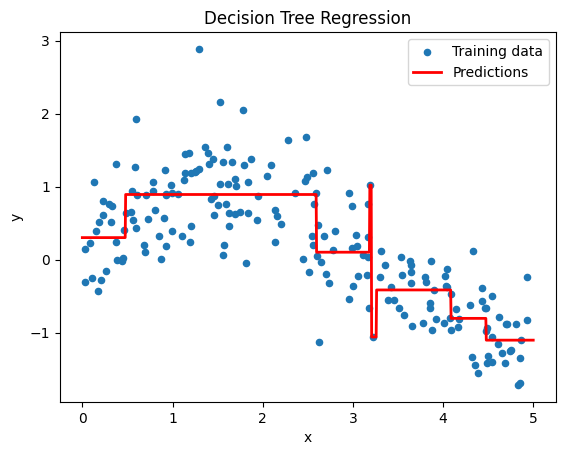

In [3]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 200
X_reg = np.sort(5 * np.random.rand(m, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + 0.5 * np.random.randn(m)

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_reg, y_reg)

# Prediksi dan visualisasi
X_test = np.linspace(0, 5, 1000).reshape(-1, 1)
y_pred = tree_reg.predict(X_test)

plt.scatter(X_reg, y_reg, s=20, label='Training data')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Predictions')
plt.title('Decision Tree Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# **Keterbatasan: Ketidakstabilan dan Sensitivitas**
Decision Tree rentan terhadap ketidakstabilan. Perubahan kecil dalam data pelatihan bisa menghasilkan pohon dan prediksi yang sangat berbeda karena proses split yang bersifat greedy dan hierarkis.

Pendekatan untuk mengurangi ketidakstabilan:
- Menggunakan metode ensemble seperti Random Forest
- Menambahkan regularisasi
- Menggunakan kriteria pemisahan yang lebih robust